Notre projet est décomposé en 3 parties :

- <b>L'Exploration</b>, le Nettoyage (Exploratory Data Analysis (EDA)) et la Normalisation du Texte.
- <b>La Transformation</b> du texte et la création de features
- <b>La Classification</b> du Texte à l'aide du ML

# <font color = Green>Partie 1 : Exploratory Data Analysis</font>

Objectifs :
- Comprendre la forme et la structure de nos données
- Faire un premier netttoyage de nos données
- Avoir une première représentation de nos données
- Repérer des patterns dans nos données

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Contexte</font>

Bibliothèque de prétraitement : nltk et spacy.
</br>nltk est simple mais un peu désuet. Il reste toutefois très utile pour les traitements de bases. 
</br>Spacy est une bibliothèque plus récente permettant des traitements plus petinents.

### <font color = grey>1.2 Librairies</font>

In [218]:
#Librairies classiques
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [219]:
#Contenu du repertoire
!tree

Folder PATH listing for volume OS
Volume serial number is 6A45-4B07
C:.
+---cleaned
�   +---.ipynb_checkpoints
+---source


### <font color = grey>1.3 Chargement des données</font>

In [220]:
#Chemin de notre fichier source
data = "./source/"
os.listdir(data)

['QueryResults.csv']

In [221]:
#Chargement du Dataframe
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


### <font color = grey>1.4 Filtre / échantillonage</font>

Suite a des contrainte machine ainsi que pour améliorer la rapidité des traitements,
</br>Nous ne conservons que les thread ayant plus de 300 de score,
</br>Cela permet également de filtrer les articles mal renseignés (moins pertinants)

In [222]:
df = df[df['Score']>300]

-----

## <font color = purple>2. Premier apperçu des données</font>

### <font color = grey>2.1 Affichage du dataframe</font>

In [223]:
#5 premiers éléments
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
5,MyISAM versus InnoDB,<p>I'm working on a projects which involves a ...,<mysql><database><performance><innodb><myisam>,20148,889,302335,391,25
7,Recommended SQL database design for tags or ta...,<p>I've heard of a few ways to implement taggi...,<sql><database-design><tags><data-modeling><ta...,20856,327,121063,308,6
8,What is the difference between #include <filen...,<p>What is the difference between using angle ...,<c++><c><include><header-files><c-preprocessor>,21593,2868,780003,708,31
15,How do I size a UITextView to its content?,<p>Is there a good way to adjust the size of a...,<ios><cocoa-touch><autolayout><uikit><uitextview>,50467,552,412260,306,41
16,Batch file to delete files older than N days,<p>I am looking for a way to delete all files ...,<windows><date><batch-file><file-io><cmd>,51054,728,1280692,247,25


In [224]:
#5 derniers éléments
df.tail(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
27562,No matching client found for package name (Goo...,<p><strong>Context:</strong></p>\n\n<p>I'm try...,<android><android-studio><gradle><google-analy...,34990479,560,619409,76,33
27571,Why is Haskell (GHC) so darn fast?,<p>Haskell (with the <code>GHC</code> compiler...,<performance><haskell><ghc><higher-order-funct...,35027952,318,66364,128,3
27587,NPM vs. Bower vs. Browserify vs. Gulp vs. Grun...,<p>I'm trying to summarize my knowledge about ...,<gruntjs><npm><gulp><bower><webpack>,35062852,2039,302677,1379,7
27626,Why is 2 * (i * i) faster than 2 * i * i in Java?,<p>The following Java program takes on average...,<java><performance><benchmarking><bytecode><jit>,53452713,896,251661,300,10
27643,Pandas Merging 101,<ul>\n<li>How can I perform a (<code>INNER</co...,<python><pandas><join><merge><concatenation>,53645882,783,306826,691,6


In [225]:
#5 individus au hasard (sample)
df.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
9418,"Difference and uses of onCreate(), onCreateVie...",<p>What are the differences between <code>onCr...,<android><android-fragments><android-lifecycle...,28929637,370,169094,155,3
1994,What are MVP and MVC and what is the difference?,"<p>When looking beyond the <a href=""https://en...",<user-interface><model-view-controller><design...,2056,2308,547336,1352,24
7083,Comparing two byte arrays in .NET,<p>How can I do this fast?</p>\n\n<p>Sure I ca...,<c#><.net><arrays><performance><j#>,43289,610,387021,134,28
5109,Serializing to JSON in jQuery,"<p>I need to <a href=""https://en.wikipedia.org...",<javascript><jquery><ajax><json><serialization>,191881,1231,917186,297,11
7882,Can you run GUI applications in a Linux Docker...,<p>How can you run GUI applications in a Linux...,<linux><docker><x11><sandbox><vnc>,16296753,484,379038,284,24


Suite à cette première analyse,
</br>nous remarquons des choses intéréssantes :
- la présence de balises html dans le body
- la présence de mots particulier, C# par exemple
- la présence des caractère <> pour séparer les tags

### <font color = grey>2.2. Structure</font>

In [226]:
#Taille du dataframe
df.shape

(1675, 8)

In [227]:
#Type de données
df.dtypes

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [228]:
#Information du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1675 entries, 5 to 27643
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          1675 non-null   object
 1   Body           1675 non-null   object
 2   Tags           1675 non-null   object
 3   Id             1675 non-null   int64 
 4   Score          1675 non-null   int64 
 5   ViewCount      1675 non-null   int64 
 6   FavoriteCount  1675 non-null   int64 
 7   AnswerCount    1675 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 117.8+ KB


In [229]:
#Nombre de colonne par type (Utile pour beaucoup de colonne)
df.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [230]:
#nb de valeurs unique par colonne
df.nunique()

Title            1675
Body             1675
Tags             1666
Id               1675
Score             785
ViewCount        1673
FavoriteCount     566
AnswerCount        77
dtype: int64

Nous avons 1675 individus, nous remarquons donc que :
- Tous les titres sont différents
- Tous les Body sont différents
- les suites de tags
- Un ID est attribué à chaque individu (clef primaire en SQL)

### <font color = grey>2.3 NaN et valeurs dupliquées</font>

In [231]:
#Nb de Nan par colonne
df.isna().sum().sort_values() 

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [232]:
#Ratio Nan par colonne
df.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [233]:
#Nombre d'individus dupliquée (i.e. toute les colonnes sont égales)
df.duplicated().sum()

0

In [234]:
#Nombre d'individus dupliquée par colonne
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 9
col : Id -> duplicated : 0
col : Score -> duplicated : 890
col : ViewCount -> duplicated : 2
col : FavoriteCount -> duplicated : 1109
col : AnswerCount -> duplicated : 1598


On remarque qu'il y a <b>9 individus en doublons</b> au niveau des tags.
</br>Cela n'est en rien surpprenant. En effet, avoir 2 individus avec les même tags n'est pas incohérent.

In [235]:
#Affichage des lignes dupliquées pour "Tags"
idx = df.duplicated(subset = "Tags", keep = "first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
2901,What does the @ symbol before a variable name ...,<blockquote>\n <p><strong>Possible Duplicate:...,<c#><variables><naming><specifications><reserv...,429529,592,223950,78,4
22528,What does T&& (double ampersand) mean in C++11?,<p>I've been looking into some of the new feat...,<c++><c++11><rvalue-reference><c++-faq><perfec...,5481539,981,286223,494,4
11433,Best way to center a <div> on a page verticall...,<p>Best way to center a <code>&lt;div&gt;</cod...,<html><css><alignment><vertical-alignment><cen...,356809,598,1115847,261,30
22523,"Only using @JsonIgnore during serialization, b...",<p>I have a user object that is sent to and fr...,<java><json><spring><annotations><jackson>,12505141,412,417636,116,9
20981,JavaScript seconds to time string with format ...,"<p>I want to convert a duration of time, i.e.,...",<javascript><date><time><date-format><time-for...,6312993,381,607041,104,46
21641,How to check if an object is a Promise?,<p>Whether it's an ES6 <code>Promise</code> or...,<javascript><promise><q><bluebird><es6-promise>,27746304,462,216534,63,19
23192,SQL injection that gets around mysql_real_esca...,<p>Is there an SQL injection possibility even ...,<php><mysql><sql><security><sql-injection>,5741187,744,289683,298,4
18853,Why do Python classes inherit object?,<p>Why does the following class declaration in...,<python><class><oop><object><inheritance>,4015417,1572,400851,458,6
6362,SQL update query using joins,<p>I have to update a field with a value which...,<sql><sql-server><tsql><sql-server-2005><sql-u...,982919,758,1033030,179,13


### <font color = grey>2.4 Inspection des données</font>

In [236]:
# description des colonnes numériques
df.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,1.675000e+03,1675.000000,1.675000e+03,1675.000000,1675.000000
mean,1.061592e+07,836.318209,6.327589e+05,289.771343,18.456716
std,1.305355e+07,1201.698772,7.411821e+05,530.611475,13.701712
min,4.000000e+00,301.000000,1.021600e+04,22.000000,1.000000
25%,1.069044e+06,372.000000,2.359045e+05,97.000000,9.000000
50%,4.922714e+06,490.000000,4.193300e+05,165.000000,15.000000
75%,1.627697e+07,820.500000,7.566700e+05,303.000000,24.000000
max,7.230657e+07,26510.000000,1.008203e+07,11616.000000,127.000000


Ces colonnes ne nous interessent pas.

In [237]:
#description des colonnes texte
df.describe(include = object)

,Title,Body,Tags
count,1675,1675,1675
unique,1675,1675,1666
top,MyISAM versus InnoDB,<p>I'm working on a projects which involves a ...,<sql><sql-server><tsql><sql-server-2005><sql-u...
freq,1,1,2


Liste des colonnes <font color = green>conservées</font> pour la suite de notre projet :
- <b>Title</b> : Il s'agit de la question / du titre du topic
- <b>Body</b> : Il s'agit du contenu du topic, dans un premier temps nous ne l'utiliserons pas.
- <b>Tags</b> : Il s'agit de la valeur cible (Y)

Liste des colonnes <font color = red>non conservées</font> pour la suite de notre projet :
- <b>Id</b> : nous conservons les index 
- <b>Score</b> / <b>ViewCount</b> / <b>FavoriteCount</b> / <b>AnswerCount</b> : Ces colonnes ne nous sont d'aucune utilité dans la suggestion de Tags

-----

## <font color = Purple>3. Cleaning des Données</font>

### <font color = grey>3.1 Selection des colonnes</font>

In [238]:
cols = ["Title", "Body","Tags"]
df = df[cols]
df.head()

,Title,Body,Tags
5,MyISAM versus InnoDB,<p>I'm working on a projects which involves a ...,<mysql><database><performance><innodb><myisam>
7,Recommended SQL database design for tags or ta...,<p>I've heard of a few ways to implement taggi...,<sql><database-design><tags><data-modeling><ta...
8,What is the difference between #include <filen...,<p>What is the difference between using angle ...,<c++><c><include><header-files><c-preprocessor>
15,How do I size a UITextView to its content?,<p>Is there a good way to adjust the size of a...,<ios><cocoa-touch><autolayout><uikit><uitextview>
16,Batch file to delete files older than N days,<p>I am looking for a way to delete all files ...,<windows><date><batch-file><file-io><cmd>


### <font color = grey>3.2. Suppression des Nan</font>

In [239]:
df.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

Pas de Nan ==> pas de suppression. 
</br>sinon, on utilise la fonction dropna()

### <font color = grey>3.3 Gestion des valeurs dupliquées</font>

In [240]:
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 9


Pas d'action car les tags dupliquées sont "logique", sinon :

In [241]:
#Drop duplciate :
#df.drop_duplicates(subset = "COLONNE", inplace = True)

----

## <font color = purple>4. Exploration des Données</font>

### <font color = grey>4.1. La cible (Tags)</font>

In [242]:
#supression des <, >
df["Tags"] = df["Tags"].str.replace("><"," ")
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">","")

In [243]:
df["Tags"].head(10)

5              mysql database performance innodb myisam
7        sql database-design tags data-modeling tagging
8             c++ c include header-files c-preprocessor
15          ios cocoa-touch autolayout uikit uitextview
16                  windows date batch-file file-io cmd
23        sql postgresql sql-update duplicates distinct
24                            c++ oop class struct ooad
26               python class oop types new-style-class
31    oop definition solid-principles design-princip...
32    oop interface language-agnostic base-class sta...
Name: Tags, dtype: object

In [244]:
#Nombre d'apparation de la suite de tag
df.Tags.value_counts()

sql sql-server tsql sql-server-2005 sql-update           2
javascript promise q bluebird es6-promise                2
php mysql sql security sql-injection                     2
c# variables naming specifications reserved-words        2
c++ c++11 rvalue-reference c++-faq perfect-forwarding    2
                                                        ..
sql sql-server database tsql alter-table                 1
java jaxb java-9 java-11 java-10                         1
node.js google-chrome firebug websocket socket.io        1
node.js ubuntu gruntjs npm-install node-modules          1
python pandas join merge concatenation                   1
Name: Tags, Length: 1666, dtype: int64

In [245]:
#Fréquence d'apparation de la suite de tags
df.Tags.value_counts(normalize = True)

sql sql-server tsql sql-server-2005 sql-update           0.001194
javascript promise q bluebird es6-promise                0.001194
php mysql sql security sql-injection                     0.001194
c# variables naming specifications reserved-words        0.001194
c++ c++11 rvalue-reference c++-faq perfect-forwarding    0.001194
                                                           ...   
sql sql-server database tsql alter-table                 0.000597
java jaxb java-9 java-11 java-10                         0.000597
node.js google-chrome firebug websocket socket.io        0.000597
node.js ubuntu gruntjs npm-install node-modules          0.000597
python pandas join merge concatenation                   0.000597
Name: Tags, Length: 1666, dtype: float64

### <font color = grey>4.2. body</font>

In [246]:
df["Body"].head(10)

5     <p>I'm working on a projects which involves a ...
7     <p>I've heard of a few ways to implement taggi...
8     <p>What is the difference between using angle ...
15    <p>Is there a good way to adjust the size of a...
16    <p>I am looking for a way to delete all files ...
23    <p>I need to retrieve all rows from a table wh...
24    <p>In what scenarios is it better to use a <co...
26    <p>What is the difference between old style an...
31    <p>I have heard that the Liskov Substitution  ...
32    <p>When should I use an interface and when sho...
Name: Body, dtype: object

In [247]:
from bs4 import BeautifulSoup

In [248]:
#supression des balises html
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [249]:
df["Body"].head(10)

5     I'm working on a projects which involves a lot...
7     I've heard of a few ways to implement tagging;...
8     What is the difference between using angle bra...
15    Is there a good way to adjust the size of a UI...
16    I am looking for a way to delete all files old...
23    I need to retrieve all rows from a table where...
24    In what scenarios is it better to use a struct...
26    What is the difference between old style and n...
31    I have heard that the Liskov Substitution  Pri...
32    When should I use an interface and when should...
Name: Body, dtype: object

### <font color = grey>4.3. Title</font>

In [250]:
#Longueur de chaque Document :
df.Title.apply(lambda i : len(i))

5        20
7        51
8        75
15       42
16       44
         ..
27562    99
27571    34
27587    59
27626    49
27643    18
Name: Title, Length: 1675, dtype: int64

c:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

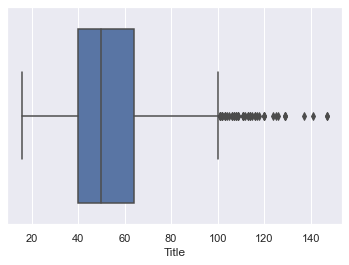

In [251]:
#Affichage avec un boxplot :
tmp = df.Title.str.len()
sns.boxplot(tmp)

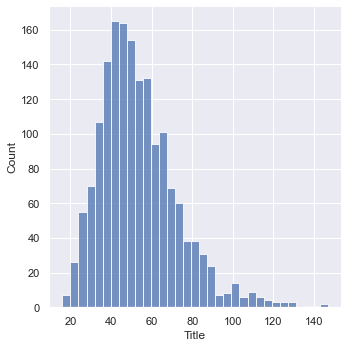

In [252]:
#Affichage sous forme de Displot :
sns.displot(tmp)

In [253]:
#Nous Stockons les infos sur la longueur du titre dans la colonne _len_title :
df["_len_txt"] = tmp

### <font color = grey>4.4. Analyse Multi-variée</font>

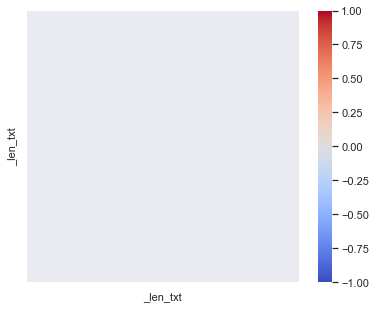

In [254]:
# Matrice de corrélation
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fog, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, fmt = ".2f", square = True)

Non utile dans notre cas car nous n'avons pas de variable Numérique !

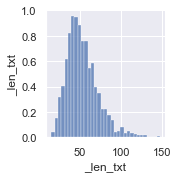

In [255]:
sns.pairplot(df)

Non utile dans notre cas car nous n'avons pas de variable Numérique

In [256]:
#Affichages des 10 plus court titres
df.sort_values("_len_txt").head(5)

,Title,Body,Tags,_len_txt
13658,Jackson Vs. Gson,After searching through some existing librarie...,java json comparison gson jackson,16
27643,Pandas Merging 101,\nHow can I perform a (INNER| (LEFT|RIGHT|FULL...,python pandas join merge concatenation,18
10664,.prop() vs .attr(),So jQuery 1.6 has the new function prop().\n$(...,javascript jquery dom attr prop,18
7154,How to copy files?,How do I copy a file in Python?\n,python file copy filesystems file-copying,18
2779,What is Type-safe?,"What does ""type-safe"" mean?\n",language-agnostic programming-languages comput...,18


In [257]:
#Affichages des 10 plus long titre
df.sort_values("_len_txt").tail(5)

,Title,Body,Tags,_len_txt
22330,"File is universal (three slices), but it does ...",I upgraded Xcode version and when using extern...,ios objective-c xcode ios6 static-libraries,129
24097,The iOS Simulator deployment targets is set to...,I'm getting this below warning message in my X...,ios xcode cocoapods ios-simulator google-fabric,137
19086,Uncaught Error: Invariant Violation: Element t...,I am getting this error:\nUncaught Error: Inva...,javascript node.js reactjs react-router jsx,141
4104,Timeout expired. The timeout period elapsed pr...,I have many users on my web site (20000-60000 ...,c# asp.net sql-server-2008-r2 timeout sqlcommand,147
1626,"Why does my JavaScript code receive a ""No 'Acc...",\nMod note: This question is about why XMLHttp...,javascript jquery cors same-origin-policy flas...,147


Nous pouvons nous séparer de la colonne "len_txt" qui a été utile pour l'analyse.

In [258]:
df.drop(columns = "_len_txt", inplace = True)
df.head()

,Title,Body,Tags
5,MyISAM versus InnoDB,I'm working on a projects which involves a lot...,mysql database performance innodb myisam
7,Recommended SQL database design for tags or ta...,I've heard of a few ways to implement tagging;...,sql database-design tags data-modeling tagging
8,What is the difference between #include <filen...,What is the difference between using angle bra...,c++ c include header-files c-preprocessor
15,How do I size a UITextView to its content?,Is there a good way to adjust the size of a UI...,ios cocoa-touch autolayout uikit uitextview
16,Batch file to delete files older than N days,I am looking for a way to delete all files old...,windows date batch-file file-io cmd


In [259]:
#Enregistrement en csv :
df.to_csv("cleaned/df_cleaned.csv", index = False)

### <font color = grey>4.5. Exploration du Corpus et des Documents</font>

Création de la fonction "Print N documents au hasard"

In [260]:
def print_sample(sub_df, n_samp = 10) :
    """Visualisation n_samp documents du Corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows() :
        print("Title :" + ser["Title"] + "\n\n" + "Tags :" + ser["Tags"] + "\n\n" + ser["Body"] + "..." + "\n\n")

In [261]:
print_sample(df, n_samp = 2)

Title :How to show the "Are you sure you want to navigate away from this page?" when changes committed?

Tags :javascript html message onbeforeunload confirm

Here in stackoverflow, if you started to make changes then you attempt to navigate away from the page, a javascript confirm button shows up and asks: "Are you sure you want to navigate away from this page?" blee blah bloo...
Has anyone implemented this before, how do I track that changes were committed?
I believe I could do this myself, I am trying to learn the good practices from you the experts.
I tried the following but still doesn't work:
<html>
<body>
    <p>Close the page to trigger the onunload event.</p>
    <script type="text/javascript">
        var changes = false;        
        window.onbeforeunload = function() {
            if (changes)
            {
                var message = "Are you sure you want to navigate away from this page?\n\nYou have started writing or editing a post.\n\nPress OK to continue or Cancel

--------
--------

# <font color = green>Partie 2 : Text Processing</font>

## <font color = purple>1. Préliminaires</font>

### <font color = grey>1.1. Contexte</font>

L'objectif de cette partie est :
- d'Explorer les principales transormations
- d'Analyser le corpus
- d'Essayer différents transofrmations
- de Réduire la dimensionnalité de nos données (réduction du nb de tokens sur notre corpus)

### <font color = grey>1.2. Librairies</font>

In [262]:
# builtin :
import os, sys, time, random

# data :
import pandas as pd
import numpy as np

# NLP :
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Spacy :
import spacy

# Vizualisation :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image #Pillow

# Pandarallel : Permet d'executer du code sur un nombre choisi de cpu
from pandarallel import pandarallel 

### <font color = grey>1.3. Librairies externes et Options</font>

Afin d'utiliser certaines fonctionalitées nltk il faut télécharger des librairies externes (Asset).
</br>ex: "stopwords" contient une liste des stop words anglais.

In [263]:
#téléchargement :

nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### <font color = grey>1.4. Chargement des données</font>

In [264]:
# chemin d'accès au fichier :
data = "./cleaned/"
os.listdir(data)

['.ipynb_checkpoints',
 'df_cleaned.csv',
 'final_df.csv',
 'min_10_words.csv',
 'min_5_words.csv',
 'tokens_list.csv',
 'unique_words.csv']

In [265]:
# Chargement du dataframe :
fn = data + "df_cleaned.csv"
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,MyISAM versus InnoDB,I'm working on a projects which involves a lot...,mysql database performance innodb myisam
1,Recommended SQL database design for tags or ta...,I've heard of a few ways to implement tagging;...,sql database-design tags data-modeling tagging
2,What is the difference between #include <filen...,What is the difference between using angle bra...,c++ c include header-files c-preprocessor
3,How do I size a UITextView to its content?,Is there a good way to adjust the size of a UI...,ios cocoa-touch autolayout uikit uitextview
4,Batch file to delete files older than N days,I am looking for a way to delete all files old...,windows date batch-file file-io cmd


In [266]:
#Taille du dataframe
df.shape

(1675, 3)

In [267]:
#En cas de problème de perf, creation du sample
# df = df.sample(frac = 0.3)

------------

## <font color = purple>2. Travail sur un document spécifique</font>

Création d'une fonction pour selectionner aléatoirement un Document de notre corpus.

In [268]:
def get_random_doc(sub_df) :
    doc = sub_df.Body.sample(1) #prendre 1 individu sample(1)
    doc = doc.values[0] #Valeur de la colonne 0 (Title dans notre cas)
    return doc

In [269]:
doc = get_random_doc(df)
doc

'I am writing a batch file script using Windows command-line environment and want to change each occurrence of some text in a file (ex. "FOO") with another (ex. "BAR"). What is the simplest way to do that? Any built in functions?\n'

### <font color = grey>2.1. Application de lower() (mise en minuscule)</font>

In [270]:
# mettre en minuscule tout le Texte
doc = doc.lower()
doc

'i am writing a batch file script using windows command-line environment and want to change each occurrence of some text in a file (ex. "foo") with another (ex. "bar"). what is the simplest way to do that? any built in functions?\n'

### <font color = grey>2.2. Tokenization</font>

Création d'une fonction d'affichage des informations d'une liste de tokens :

In [271]:
def display_tokens_info(tokens) :
    """affiche les informations tokens d'un corpus"""
    
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [272]:
# Méthode tokenisation 1 : Word_tokenize
tokens = word_tokenize(doc)
display_tokens_info(tokens)

nb tokens 54, nb tokens uniques 42
['i', 'am', 'writing', 'a', 'batch', 'file', 'script', 'using', 'windows', 'command-line', 'environment', 'and', 'want', 'to', 'change', 'each', 'occurrence', 'of', 'some', 'text', 'in', 'a', 'file', '(', 'ex', '.', '``', 'foo', "''", ')']


In [273]:
# Méthode tokenisation 2 : wordpunct
tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 53, nb tokens uniques 44
['i', 'am', 'writing', 'a', 'batch', 'file', 'script', 'using', 'windows', 'command', '-', 'line', 'environment', 'and', 'want', 'to', 'change', 'each', 'occurrence', 'of', 'some', 'text', 'in', 'a', 'file', '(', 'ex', '.', '"', 'foo']


In [274]:
# Méthode tokenisation 3 :  regexp 
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 42, nb tokens uniques 37
['i', 'am', 'writing', 'a', 'batch', 'file', 'script', 'using', 'windows', 'command', 'line', 'environment', 'and', 'want', 'to', 'change', 'each', 'occurrence', 'of', 'some', 'text', 'in', 'a', 'file', 'ex', 'foo', 'with', 'another', 'ex', 'bar']


### <font color = grey>2.3. Stopwords</font>

Stopwords : liste de mot générique (ex en fr : conjonction de coordination mais, ou, est, donc etc..).
</br>Nous les supprimmons de notre liste de token.

In [275]:
# liste des stop words nltk
stop_words = set(stopwords.words("english"))
print(stop_words)

{'if', 'because', 'up', 'own', 'll', 'only', "didn't", 'their', 'a', 'hadn', 're', 'who', 'each', "needn't", 'was', 'very', 'that', 'against', 'mustn', 'themselves', "wasn't", 'into', 'any', 'do', 'while', 've', 'be', 'other', 'at', 'yourself', 'out', 'don', 'by', 'wouldn', 'did', 'in', 'yours', 'hasn', "haven't", 'just', 'further', 'theirs', "couldn't", 'there', 'o', "it's", "you'd", 'most', 'then', 'having', 'our', 'from', 'itself', 'or', 'them', 'how', 'such', 'for', 't', 'wasn', 'too', 'you', 'under', 'they', 'below', 'can', 'weren', "you've", 'y', "you're", "aren't", "shouldn't", "that'll", "doesn't", "mightn't", 'we', 'didn', 'will', 'couldn', 'he', 'all', 'same', "won't", 'these', 'ourselves', "shan't", 'its', 'before', 'my', "she's", 'off', 'what', 'more', 'above', 'yourselves', "mustn't", 'doesn', 'this', 'when', 'ain', "you'll", 'herself', "wouldn't", 'isn', 'should', 'been', 'himself', 'doing', 'over', 'through', 'ours', 'to', "don't", 'are', 'haven', 'both', 'during', 'whic

In [276]:
#filtre, on enlève les stop words de notre liste de tokens
tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 23, nb tokens uniques 21
['writing', 'batch', 'file', 'script', 'using', 'windows', 'command', 'line', 'environment', 'want', 'change', 'occurrence', 'text', 'file', 'ex', 'foo', 'another', 'ex', 'bar', 'simplest', 'way', 'built', 'functions']


### <font color = grey>2.4. Première fonction de cleaning</font>

L'objectif de cette fonction est d'appliquer les différentes transformations précédente sur notre document :
</br>(1) Mise en minuscule du Document.
</br>(2) Tokenisation avec Regexp (changer la tokenisation au besoin)
</br>(3) Suppression des StopWords

In [277]:
def process_text_1(doc, rejoin = False) :
    """première fonction de texte procressing"""
    
    # Mise en minuscule du text (Lower) et suppressions des espace avant et après le mot (strip) :
    doc =  doc.lower().strip()
    
    # tokenisation Regexp
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    # Suppression des stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    # si Rejoin = True : Renvoi un texte avec les tokens séparer par un espace
    # si Rejoin = False (default value) : Renvoi la liste des tokens
    if rejoin :
        return " ".join(cleaned_tokens_list)
        
    return cleaned_tokens_list

In [278]:
#Appliquons notre fonction
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 23, nb tokens uniques 21
['writing', 'batch', 'file', 'script', 'using', 'windows', 'command', 'line', 'environment', 'want', 'change', 'occurrence', 'text', 'file', 'ex', 'foo', 'another', 'ex', 'bar', 'simplest', 'way', 'built', 'functions']


--------

## <font color = Purple>3. Travail sur le corpus en entier</font>

### <font color = grey>3.1. Construction de "raw corpus"</font>

Le premier objectif est de reconstituer notre corpus et de joindre l'ensemble des documents entre eux.
</br>En vulgarisant : On transforme un ensemble de document (notre corpus) en un gros document raw_corpus qui contient l'intégralité des mots de chaque document.
</br>
</br>Afin d'affiner l'analyse de notre dataset, nous allons étudier 3 raw corpus :
- Celui créé à partir des Title
- Celui créé à partir des Body
- Celui créé à partir des Tags

</br>
L'objectif étant d'effectuer une analyse des différents tokens présent dans chacun d'entres eux et de s'affranchir des tokens non pertinents.


In [279]:
#jointure de tous les documents title de notre corpus
raw_corpus_title = "".join(df.Title.values)
print("Title :" + "\n" + raw_corpus_title[:1000] + "\n") #Affichage des 1000 premier Caractères

#jointure de tous les documents Body de notre corpus
raw_corpus_body = "".join(df.Body.values)
print("Body :" + "\n" + raw_corpus_body[:1000] + "\n") #Affichage des 1000 premier Caractères

#jointure de tous les documents Tags de notre corpus
raw_corpus_tags = "".join(df.Tags.values)
print("Tags :" + "\n" + raw_corpus_tags[:1000] + "\n") #Affichage des 1000 premier Caractères

Title :
MyISAM versus InnoDBRecommended SQL database design for tags or taggingWhat is the difference between #include <filename> and #include "filename"?How do I size a UITextView to its content?Batch file to delete files older than N daysHow do I (or can I) SELECT DISTINCT on multiple columns?When should you use a class vs a struct in C++?What is the difference between old style and new style classes in Python?What is an example of the Liskov Substitution Principle?Interface vs Base classHow do I execute a program or call a system command?How can I detect the encoding/codepage of a text fileHow to escape braces (curly brackets) in a format string in .NETWhat's the use/meaning of the @ character in variable names in C#?What are the differences between struct and class in C++?time.sleep -- sleeps thread or process?What is a Y-combinator?What is the difference between Views and Materialized Views in Oracle?What is the difference between range and xrange functions in Python 2.X?What is t

In [280]:
#Nombre de charactère des Raw_corpus
print("Title : " + str(len(raw_corpus_title)))
print("Body : " + str(len(raw_corpus_body)))
print("Tags : " + str(len(raw_corpus_tags)))

Title : 89371
Body : 1258481
Tags : 76303


In [281]:
#Utilisation de notre première fonction de cleaning / obtention des tokens :
print("Title :")
corpus_title = process_text_1(raw_corpus_title)
display_tokens_info(corpus_title)

print("\nBody :")
corpus_body = process_text_1(raw_corpus_body)
display_tokens_info(corpus_body)

print("\nTags :")
corpus_tags = process_text_1(raw_corpus_tags)
display_tokens_info(corpus_tags)

Title :
nb tokens 9075, nb tokens uniques 3252
['myisam', 'versus', 'innodbrecommended', 'sql', 'database', 'design', 'tags', 'taggingwhat', 'difference', 'include', 'filename', 'include', 'filename', 'size', 'uitextview', 'content', 'batch', 'file', 'delete', 'files', 'older', 'n', 'dayshow', 'select', 'distinct', 'multiple', 'columns', 'use', 'class', 'vs']

Body :
nb tokens 126692, nb tokens uniques 13828
['working', 'projects', 'involves', 'lot', 'database', 'writes', 'say', '70', 'inserts', '30', 'reads', 'ratio', 'would', 'also', 'include', 'updates', 'consider', 'one', 'read', 'one', 'write', 'reads', 'dirty', 'e', 'g', 'need', '100', 'accurate', 'information', 'time']

Tags :
nb tokens 9478, nb tokens uniques 3182
['mysql', 'database', 'performance', 'innodb', 'myisamsql', 'database', 'design', 'tags', 'data', 'modeling', 'taggingc', 'c', 'include', 'header', 'files', 'c', 'preprocessorios', 'cocoa', 'touch', 'autolayout', 'uikit', 'uitextviewwindows', 'date', 'batch', 'file', 

In [282]:
#fréquence d'apparation dans le corpus
title_freq = pd.Series(corpus_title).value_counts()
body_freq = pd.Series(corpus_body).value_counts()
tags_freq = pd.Series(corpus_tags).value_counts()

print("Title :")
display(title_freq)
print("\n\nBody :")
display(body_freq)
print("\n\nTags :")
display(tags_freq)

Title :


vs             105
using           98
difference      94
use             93
c               76
              ... 
preserving       1
suddenly         1
across           1
projectshow      1
101              1
Length: 3252, dtype: int64



Body :


0             1706
1             1481
2              970
using          697
c              668
              ... 
scms             1
vital            1
jsonloader       1
isalpha          1
guides           1
Length: 13828, dtype: int64



Tags :


net               186
c                 148
android           132
sql                90
git                90
                 ... 
getjava             1
hql                 1
criteria            1
criteriapython      1
jitpython           1
Length: 3182, dtype: int64

Text(0.5, 0, "NB d'apparition")

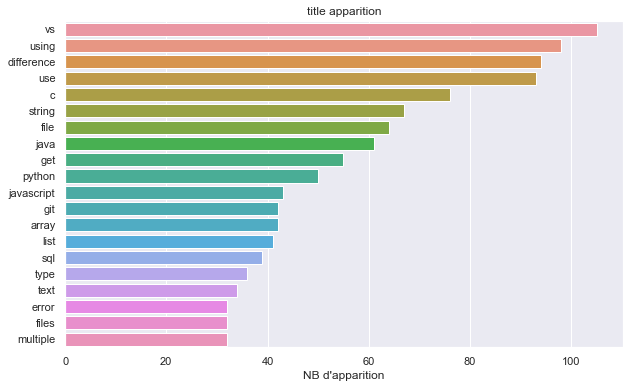

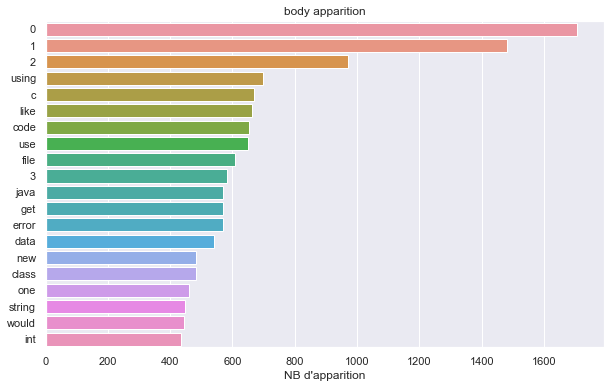

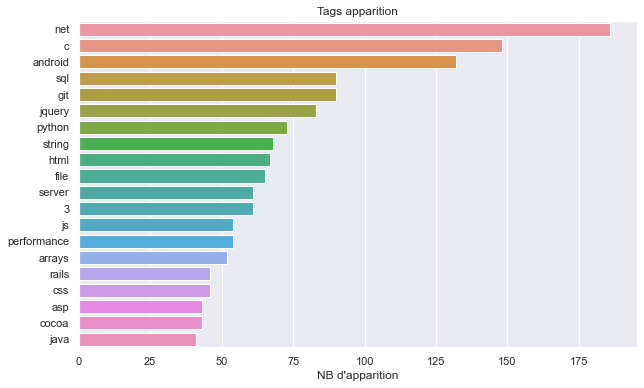

In [283]:
#visualization ATTENTION PREND BEAUCOUP DE TEMPS
plt.figure(figsize=(10,6))
title_barplot = sns.barplot(x=title_freq.head(20).values, y=title_freq.head(20).index)
title_barplot.set_title("title apparition")
title_barplot.set_xlabel("NB d'apparition")

plt.figure(figsize=(10,6))
body_barplot = sns.barplot(x=body_freq.head(20).values, y=body_freq.head(20).index)
body_barplot.set_title("body apparition")
body_barplot.set_xlabel("NB d'apparition")

plt.figure(figsize=(10,6))
tags_barplot = sns.barplot(x=tags_freq.head(20).values, y=tags_freq.head(20).index)
tags_barplot.set_title("Tags apparition")
tags_barplot.set_xlabel("NB d'apparition")


In [284]:
#les 15 tokens les plus présents
print("Title :")
display(title_freq.head(15))
print("\n\nBody :")
display(body_freq.head(15))
print("\n\nTags :")
display(tags_freq.head(15))


Title :


vs            105
using          98
difference     94
use            93
c              76
string         67
file           64
java           61
get            55
python         50
javascript     43
git            42
array          42
list           41
sql            39
dtype: int64



Body :


0        1706
1        1481
2         970
using     697
c         668
like      663
code      653
use       649
file      607
3         583
java      571
get       570
error     568
data      542
new       484
dtype: int64



Tags :


net            186
c              148
android        132
sql             90
git             90
jquery          83
python          73
string          68
html            67
file            65
server          61
3               61
js              54
performance     54
arrays          52
dtype: int64

In [285]:
#les 15 tokens les moins présents
print("Title :")
display(title_freq.head(15))
print("\n\nBody :")
display(body_freq.head(15))
print("\n\nTags :")
display(tags_freq.head(15))

Title :


vs            105
using          98
difference     94
use            93
c              76
string         67
file           64
java           61
get            55
python         50
javascript     43
git            42
array          42
list           41
sql            39
dtype: int64



Body :


0        1706
1        1481
2         970
using     697
c         668
like      663
code      653
use       649
file      607
3         583
java      571
get       570
error     568
data      542
new       484
dtype: int64



Tags :


net            186
c              148
android        132
sql             90
git             90
jquery          83
python          73
string          68
html            67
file            65
server          61
3               61
js              54
performance     54
arrays          52
dtype: int64

In [286]:
tmp.describe()

#Describe
print("Title :")
display(title_freq.describe())
print("\n\nBody :")
display(body_freq.describe())
print("\n\nTags :")
display(tags_freq.describe())

Title :


count    3252.000000
mean        2.790590
std         5.788978
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       105.000000
dtype: float64



Body :


count    13828.000000
mean         9.161990
std         37.624245
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1706.000000
dtype: float64



Tags :


count    3182.000000
mean        2.978630
std         7.780964
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       186.000000
dtype: float64

75% des tokens sont présents au moins 2 fois avec un max à 105 de fréquence d'apparation

In [287]:
#sns.displot(tmp) #gourmand

In [288]:
#sns.boxplot(tmp) #gourmand

### <font color = grey>3.2. Liste des tokens peu présent dans le corpus</font>

Unique words :

In [289]:
# liste des unique words (mot présent 1 fois dans le corpus)
list_unique_words_title = title_freq[title_freq == 1]
list_unique_words_body = body_freq[body_freq == 1]
list_unique_words_tags = tags_freq[tags_freq == 1]

print("Title :")
display(list_unique_words_title[:15])
print("\n\nBody :")
display(list_unique_words_body[:15])
print("\n\nTags :")
display(list_unique_words_tags[:15])

Title :


dateerror          1
zeroes             1
iterateet          1
matlab             1
mysql2             1
iteratees          1
darn               1
lifting            1
enumeratort        1
extensionhow       1
blurring           1
sprintfhow         1
overlay            1
itemsjavascript    1
jackson            1
dtype: int64



Body :


messagebox    1
8569          1
castle        1
ninject       1
is_object     1
is_string     1
isjson        1
decisions     1
13935         1
reviewed      1
strengths     1
extreme       1
codefirst     1
globality     1
524s          1
dtype: int64



Tags :


dst                 1
xapianjavascript    1
behaviorpython      1
xcode7android       1
literaljava         1
optionalc           1
gpsc                1
754java             1
pievim              1
indentbash          1
methodandroid       1
nsurlsession        1
nsurlconnection     1
utc                 1
unspecified         1
dtype: int64

In [290]:

print("Title : " + str(len(list_unique_words_title)))
print("Body : " + str(len(list_unique_words_body)))
print("Tags : " + str(len(list_unique_words_tags)))

Title : 2042
Body : 5943
Tags : 2266


In [291]:
list_unique_words_title

dateerror      1
zeroes         1
iterateet      1
matlab         1
mysql2         1
              ..
preserving     1
suddenly       1
across         1
projectshow    1
101            1
Length: 2042, dtype: int64

In [292]:
#Création de listes
list_title = list_unique_words_title.index.tolist()
list_body = list_unique_words_body.index.tolist()
list_tags = list_unique_words_tags.index.tolist()

In [293]:
#concaténation des listes
List_unique_words = list_title + list_body + list_tags

In [294]:
#rmeove duplicates
List_unique_words = list(dict.fromkeys(List_unique_words))

### <font color = grey>3.3. 2ème fonction de Cleaning</font>

L'objectif est d'améliorer notre première fonction en lui ajoutant :
</br>(1) un filtre sur les mots rares (liste de mot rare à fournir)
</br>(2) un filtre sur la longueur des mots "min_len_word"
</br>(3) le paramètre force_is_alpha afin de ne prendre que les charactères alpahabétiques.

In [295]:
def process_text_2(doc,
                  rejoin = False,
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True):
    """cf process_text_1 but with list_unique_words, min_len_word, and force_is_alpha
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    optionnal args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with a numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unique_words
    if list_rare_words is None:
        list_rare_words = []
        
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #non rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################
    
    #manage return type
    if rejoin :
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [296]:
#Utilisation de notre deuxième fonction de cleaning / obtention des tokens :
print("Title :")
corpus_title = process_text_2(raw_corpus_title, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_title)

print("\nBody :")
corpus_body = process_text_2(raw_corpus_body, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_body)

print("\nTags :")
corpus_tags = process_text_2(raw_corpus_tags, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_tags)

Title :
nb tokens 5785, nb tokens uniques 979
['versus', 'sql', 'database', 'design', 'tags', 'include', 'filename', 'include', 'filename', 'size', 'uitextview', 'content', 'file', 'delete', 'files', 'select', 'distinct', 'multiple', 'class', 'struct', 'style', 'new', 'style', 'classes', 'python', 'interface', 'execute', 'program', 'call', 'system']

Body :
nb tokens 80904, nb tokens uniques 5193
['working', 'projects', 'involves', 'lot', 'database', 'writes', 'inserts', 'reads', 'ratio', 'would', 'also', 'include', 'updates', 'consider', 'one', 'read', 'one', 'write', 'reads', 'need', 'accurate', 'time', 'read', 'task', 'question', 'million', 'database', 'read', 'bunch', 'stuff']

Tags :
nb tokens 5854, nb tokens uniques 683
['mysql', 'database', 'performance', 'database', 'design', 'tags', 'data', 'include', 'header', 'files', 'touch', 'uikit', 'date', 'file', 'file', 'postgresql', 'sql', 'duplicates', 'oop', 'class', 'struct', 'class', 'oop', 'types', 'new', 'style', 'definition', '

In [297]:
#fréquence d'apparation dans le corpus
title_freq = pd.Series(corpus_title).value_counts()
body_freq = pd.Series(corpus_body).value_counts()
tags_freq = pd.Series(corpus_tags).value_counts()

print("Title :")
display(title_freq)
print("\n\nBody :")
display(body_freq)
print("\n\nTags :")
display(tags_freq)

Title :


using        98
string       67
file         64
java         61
get          55
             ..
outer         2
asset         2
fragments     2
openssl       2
variant       2
Length: 979, dtype: int64



Body :


using            697
like             663
code             653
file             607
java             571
                ... 
httpexception      2
clazz              2
forbidden          2
generalizing       2
transpile          2
Length: 5193, dtype: int64



Tags :


net            186
android        132
sql             90
git             90
jquery          83
              ... 
positionc        2
nsstring         2
atomic           2
faqc             2
imagemagick      2
Length: 683, dtype: int64

### <font color = grey>3.4. Racinisation (Stemming) & Lemmatisation</font>

Le processus de « lemmatisation » consiste à représenter les mots (ou « lemmes ») sous leur forme canonique. 
</br>Par exemple pour un verbe, ce sera son infinitif. Pour un nom, son masculin singulier. 
</br>L'idée étant encore une fois de ne conserver que le sens des mots utilisés dans le corpus.
</br></br>Si l'on prend un exemple :  "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"
</br>L'idéal serait d'extraire les lemmes suivants : « bonjour, être, texte, exemple, cours, openclassrooms, être, attentif, cours ». Dans le processus de lemmatisation, on transforme donc « suis » en « être»  et « attentifs » en « attentif ».
</br></br></br>Il existe un autre processus qui exerce une fonction similaire qui s'appelle la racinisation(ou stemming en anglais). 
</br>Cela consiste à ne conserver que la racine des mots étudiés. L'idée étant de supprimer les suffixes, préfixes et autres des mots afin de ne conserver que leur origine. 
</br>C'est un procédé plus simple que la lemmatisation et plus rapide à effectuer puisqu'on tronque les mots essentiellement contrairement à la lemmatisation qui nécessite d'utiliser un dictionnaire.

In [298]:
doc = "Using and use. I have 3 dogs, they was all black. Now they are all white but one of my dog is my favourite"

In [299]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc.lower())
print(tokens)

['using', 'and', 'use', 'i', 'have', '3', 'dogs', 'they', 'was', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourite']


In [300]:
trans = PorterStemmer()
trans_text = [trans.stem(i) for i in tokens]
print(trans_text)

['use', 'and', 'use', 'i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourit']


In [301]:
trans = WordNetLemmatizer() #se base sur la librairie externe Wordnet téléchargé précédemment)
trans_text = [trans.lemmatize(i) for i in tokens]
print(trans_text)

['using', 'and', 'use', 'i', 'have', '3', 'dog', 'they', 'wa', 'all', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favourite']


### <font color = grey>3.5. 3eme fonction de nettoyage</font>

L'objectif est d'améliorer notre seconde fonction en lui ajoutant un paramètre permettant d'utiliser la Racinisation (Stemming) ou Lemmatisation sur nos tokens

In [302]:
def process_text_3(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True):
    """cf process_text_2 but with lemm_or_stemm
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="lem" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    #manage return type
    if rejoin :
        return " ".join(trans_text)
    
    return trans_text

In [303]:
#Utilisation de notre deuxième fonction de cleaning / obtention des tokens :
print("Title :")
corpus_title = process_text_3(raw_corpus_title, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_title)

print("\nBody :")
corpus_body = process_text_3(raw_corpus_body, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_body)

print("\nTags :")
corpus_tags = process_text_3(raw_corpus_tags, list_rare_words=List_unique_words, rejoin = False)
display_tokens_info(corpus_tags)

Title :
nb tokens 5785, nb tokens uniques 808
['versu', 'sql', 'databas', 'design', 'tag', 'includ', 'filenam', 'includ', 'filenam', 'size', 'uitextview', 'content', 'file', 'delet', 'file', 'select', 'distinct', 'multipl', 'class', 'struct', 'style', 'new', 'style', 'class', 'python', 'interfac', 'execut', 'program', 'call', 'system']

Body :
nb tokens 80904, nb tokens uniques 4057
['work', 'project', 'involv', 'lot', 'databas', 'write', 'insert', 'read', 'ratio', 'would', 'also', 'includ', 'updat', 'consid', 'one', 'read', 'one', 'write', 'read', 'need', 'accur', 'time', 'read', 'task', 'question', 'million', 'databas', 'read', 'bunch', 'stuff']

Tags :
nb tokens 5854, nb tokens uniques 638
['mysql', 'databas', 'perform', 'databas', 'design', 'tag', 'data', 'includ', 'header', 'file', 'touch', 'uikit', 'date', 'file', 'file', 'postgresql', 'sql', 'duplic', 'oop', 'class', 'struct', 'class', 'oop', 'type', 'new', 'style', 'definit', 'design', 'interfac', 'agnost']


In [304]:
#fréquence d'apparation dans le corpus
title_freq = pd.Series(corpus_title).value_counts()
body_freq = pd.Series(corpus_body).value_counts()
tags_freq = pd.Series(corpus_tags).value_counts()

print("Title :")
display(title_freq)
print("\n\nBody :")
display(body_freq)
print("\n\nTags :")
display(tags_freq)

Title :


use         104
file         96
string       67
java         61
get          61
           ... 
visibl        2
viewport      2
junit         2
servlet       2
variant       2
Length: 808, dtype: int64



Body :


use            891
file           865
get            706
like           681
code           659
              ... 
allobject        2
tie              2
unsur            2
eclipselink      2
transpil         2
Length: 4057, dtype: int64



Tags :


net            186
android        132
sql             90
git             90
jqueri          83
              ... 
positionc        2
nsstring         2
atom             2
faqc             2
imagemagick      2
Length: 638, dtype: int64

Text(0.5, 0, "NB d'apparition")

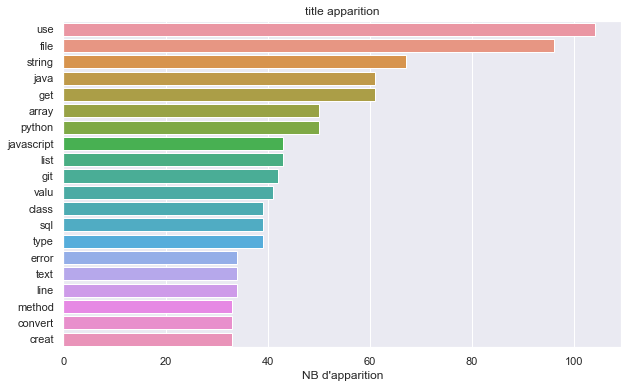

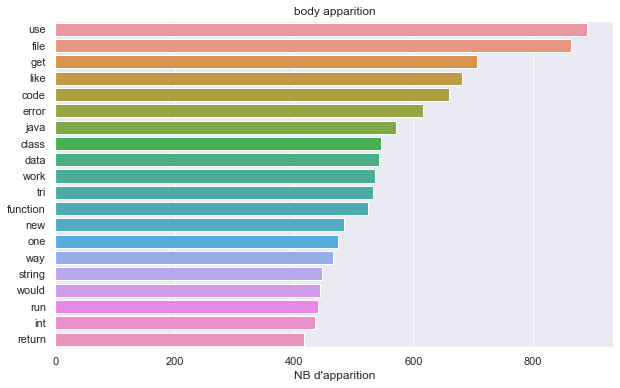

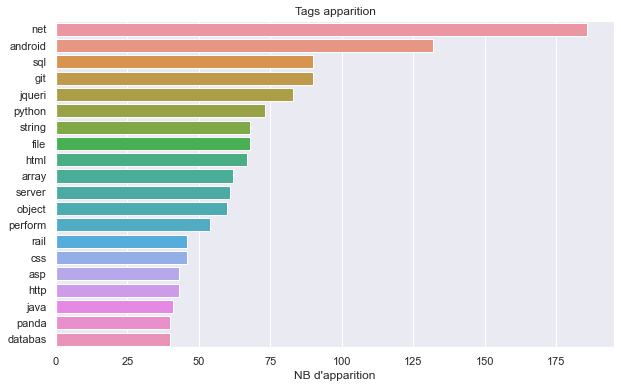

In [305]:
#visualization ATTENTION PREND BEAUCOUP DE TEMPS
plt.figure(figsize=(10,6))
title_barplot = sns.barplot(x=title_freq.head(20).values, y=title_freq.head(20).index)
title_barplot.set_title("title apparition")
title_barplot.set_xlabel("NB d'apparition")

plt.figure(figsize=(10,6))
body_barplot = sns.barplot(x=body_freq.head(20).values, y=body_freq.head(20).index)
body_barplot.set_title("body apparition")
body_barplot.set_xlabel("NB d'apparition")

plt.figure(figsize=(10,6))
tags_barplot = sns.barplot(x=tags_freq.head(20).values, y=tags_freq.head(20).index)
tags_barplot.set_title("Tags apparition")
tags_barplot.set_xlabel("NB d'apparition")

On remarque que use et using ne forme maintenant qu'un seul et même token "use"

### <font color = grey>3.6. Only English Words</font>

L'objectif est de ne conserver que les mots Anglais (pour eviter les erreur de frappe par exemple) en utilisant la librairies externe <b>nltk words</b> (liste des mots du dictionnaire).
</br>Nous allons appliquer quelques transfmoration à cette série :

In [306]:
#Affichage d'un echantillon de 30
pd.Series(words.words()).sample(30)

14787        astoundable
60714             Elkuma
185792            Sparus
122678        nationless
115404         miasmatic
24348             boldly
167216            repope
146340          picknick
118019            Mohave
75639          gastritis
105070            leamer
236065            damage
193991            suncup
8875           ankylotic
120146            mozing
90002         hypogeiody
125478    noncombustible
185549           sozolic
46045            crucily
66608              exlex
114695        metacresol
179530          shagreen
95690     intechnicality
30189           caracoli
68097           falsetto
148479         plenitide
110654    malleinization
113251            mehari
178239         senescent
59406         ecphonesis
dtype: object

Nombre de mot dans le dictionnaire :

In [307]:
len(set(words.words()))

235892

In [308]:
#mettre le texte en minuscule
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [309]:
len(set(eng_words))

234377

In [310]:
#Stemmer pour les mot (afin de pourovir l'utiliser dans notre fonction (sinon les mots ne correpsondent pas)
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']


In [311]:
len(set(eng_words_stem))

178311

In [312]:
#lemmatizer pour les mot (afin de pourovir l'utiliser dans notre fonction (sinon les mots ne correpsondent pas)
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']


In [313]:
len(set(eng_words_lem))

233450

### <font color = grey>3.7. 4ème fonction de nettoyage</font>

L'objectif est d'améliorer notre troisième fonction en lui ajoutant un paramètre permettant de ne conserver que les mots présents dans le dictionnaire.
Attention, il faut traiter les mots avec la même metohde (rascinisation ou lemmatisation) que celle souhaitée !

<font color = red>Attention nous avons des acronymes dans notre corpus.
</br>En effet, nous travaillons sur un corpus présentant des éléments relatifs à l'informatique.
</br>Utiliser le dictionnaire n'est pas judicieux.</font>

In [314]:
def process_text_4(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True,
                  eng_words = None):
    """cf process_text_3 but with selection of only english words
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="lem" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    
    #in english
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
        
    ##########################################
    ##########################################    
    #manage return type
    if rejoin :
        return " ".join(engl_text)
    
    return engl_text

### <font color = orange>3.7.bis. Vérification des élements filtrés par english Words</font><font color = red> (GOURMAND en ressource !!)</font>

In [315]:
"""
corpus_eng_words_only = process_text_4(raw_corpus,
                       rejoin = False,
                       list_rare_words = list_unique_words,
                       eng_words = eng_words_stem)
display_tokens_info(corpus_eng_words_only)
"""

'\ncorpus_eng_words_only = process_text_4(raw_corpus,\n                       rejoin = False,\n                       list_rare_words = list_unique_words,\n                       eng_words = eng_words_stem)\ndisplay_tokens_info(corpus_eng_words_only)\n'

In [316]:
"""
tmp = pd.Series(corpus_eng_words_only).value_counts()
tmp
"""

'\ntmp = pd.Series(corpus_eng_words_only).value_counts()\ntmp\n'

In [317]:
#vizualisation gourmande
#sns.barplot(tmp.index, tmp.values)

Check des mots filtré par engl words :

In [318]:
"""
vérification = [w for w in corpus if w not in corpus_eng_words_only]
"""

'\nvérification = [w for w in corpus if w not in corpus_eng_words_only]\n'

In [319]:
"""
len(set(vérification))
"""

'\nlen(set(vérification))\n'

In [320]:
"""
tmp = pd.Series(vérification).value_counts()
tmp
"""

'\ntmp = pd.Series(vérification).value_counts()\ntmp\n'

Nous perdons bien des informations importantes en appliquant le filtre english words. Nous ne l'utiliseorns pas (tel quel) dans notre projet.

### <font color = grey>3.8. Wordcloud</font>

In [321]:
def use_wordcloud(corpus):
    wordcloud = WordCloud(background_color = "white",
                     stopwords = [],
                     max_words = 50).generate(" ".join(corpus))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Title


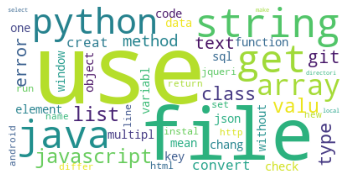

Body


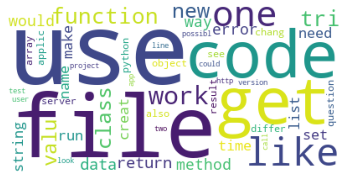

Tags


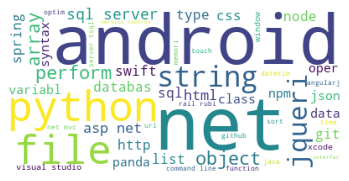

In [322]:
print("Title")
use_wordcloud(corpus_title)
print("Body")
use_wordcloud(corpus_body)
print("Tags")
use_wordcloud(corpus_tags)

### <font color = grey>3.9. 4ème fonction de nettoyage</font>

L'objectif est d'améliorer notre quatrième fonction en lui ajoutant un paramètre permettant de filtrer les tokens depuis une liste donnée extra_words.
</br>L'objectif étant d'exclure de notre liste de tokens des mots en particuliers.

In [323]:
def process_text_5(doc,
                  rejoin = False,
                   lemm_or_stemm = "stem",
                  list_rare_words=None,
                  min_len_word = 3,
                  force_is_alpha = True,
                  eng_words = None,
                  extra_words = None):
    """cf process_text_4 but exclude extra list
    
    positional arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process
    
    opt args :
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    lemm_or_stemm : str : if lem do lemmatize else stemmentize
    list_rare_words : list : a list of rare words to excluse
    min_len_words : int : the minimum lenght of words to not excluse
    force_is_alpha : int : if 1, exclude all tokens with na numéric character
    
    return :
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    #list unqiue_words
    if list_rare_words is None:
        list_rare_words = []
    
    #lower
    doc = doc.lower().strip()
    
    #tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)
    
    #Classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    
    ###########################################
    ###########################################
    
    #no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]
    
    #no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]
    
    #only alpha chars
    if force_is_alpha :
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else :
        alpha_tokens = more_than_N
    
    
    ##########################################
    ##########################################

    #stem or lem
    if lemm_or_stemm =="lem" :
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else :
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    ##########################################
    ##########################################
    
    #in english (mettre avant pour évoter le traitement du dictionnaire englais)
    if eng_words :
        engl_text = [i for i in trans_text if i in eng_words]
    else:
        engl_text = trans_text
        
    ##########################################
    ##########################################
    
    #drop extra_words tokens
    if extra_words is None :
        final = engl_text
    else :
        final = [w for w in engl_text if w not in extra_words]
    
    ##########################################
    ##########################################
    
    #manage return type
    if rejoin :
        return " ".join(final)
    
    return final

In [324]:
#Création d'une liste de extrawords :
words_to_exclude = ["use", "get", "code", "file", "like", "work"]

In [325]:
#Utilisation de notre deuxième fonction de cleaning / obtention des tokens :
print("Title :")
corpus_title = process_text_5(raw_corpus_title, list_rare_words=List_unique_words, extra_words = words_to_exclude, rejoin = False)
display_tokens_info(corpus_title)

print("\nBody :")
corpus_body = process_text_5(raw_corpus_body, list_rare_words=List_unique_words, extra_words = words_to_exclude, rejoin = False)
display_tokens_info(corpus_body)

print("\nTags :")
corpus_tags = process_text_5(raw_corpus_tags, list_rare_words=List_unique_words, extra_words = words_to_exclude, rejoin = False)
display_tokens_info(corpus_tags)

Title :
nb tokens 5471, nb tokens uniques 802
['versu', 'sql', 'databas', 'design', 'tag', 'includ', 'filenam', 'includ', 'filenam', 'size', 'uitextview', 'content', 'delet', 'select', 'distinct', 'multipl', 'class', 'struct', 'style', 'new', 'style', 'class', 'python', 'interfac', 'execut', 'program', 'call', 'system', 'command', 'detect']

Body :
nb tokens 76566, nb tokens uniques 4051
['project', 'involv', 'lot', 'databas', 'write', 'insert', 'read', 'ratio', 'would', 'also', 'includ', 'updat', 'consid', 'one', 'read', 'one', 'write', 'read', 'need', 'accur', 'time', 'read', 'task', 'question', 'million', 'databas', 'read', 'bunch', 'stuff', 'web']

Tags :
nb tokens 5755, nb tokens uniques 634
['mysql', 'databas', 'perform', 'databas', 'design', 'tag', 'data', 'includ', 'header', 'touch', 'uikit', 'date', 'postgresql', 'sql', 'duplic', 'oop', 'class', 'struct', 'class', 'oop', 'type', 'new', 'style', 'definit', 'design', 'interfac', 'agnost', 'class', 'static', 'typingpython']


In [326]:
#fréquence d'apparation dans le corpus
title_freq = pd.Series(corpus_title).value_counts()
body_freq = pd.Series(corpus_body).value_counts()
tags_freq = pd.Series(corpus_tags).value_counts()

print("Title :")
display(title_freq)
print("\n\nBody :")
display(body_freq)
print("\n\nTags :")
display(tags_freq)

Title :


string        67
java          61
array         50
python        50
javascript    43
              ..
less           2
arrayshow      2
notat          2
caus           2
variant        2
Length: 802, dtype: int64



Body :


error                                       617
java                                        571
class                                       546
data                                        542
tri                                         532
                                           ... 
uiwindow                                      2
translatesautoresizingmaskintoconstraint      2
reflex                                        2
consth                                        2
transpil                                      2
Length: 4051, dtype: int64



Tags :


net            186
android        132
git             90
sql             90
jqueri          83
              ... 
valuec           2
getter           2
propertiesc      2
objectsc         2
imagemagick      2
Length: 634, dtype: int64

Title


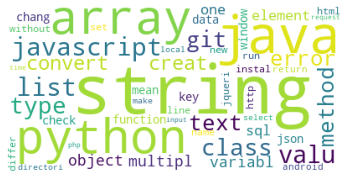

Body


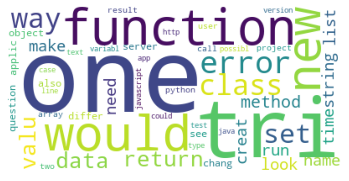

Tags


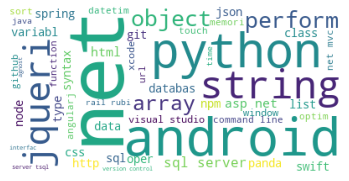

In [327]:
#word cloud :
print("Title")
use_wordcloud(corpus_title)
print("Body")
use_wordcloud(corpus_body)
print("Tags")
use_wordcloud(corpus_tags)

---------

## <font color = Purple>4. Fonction Final de Cleaning</font>

In [328]:
def final_clean(doc) :
    new_doc = process_text_5(doc, rejoin = True, list_rare_words = list_unique_words, extra_words = words_to_exclude)
    return new_doc

In [329]:
final_clean(raw_corpus_title)

'myisam versu innodbrecommend sql databas design tag taggingwhat differ includ filenam includ filenam size uitextview content batch delet older dayshow select distinct multipl column class struct differ old style new style class python exampl liskov substitut principl interfac base classhow execut program call system command detect encod codepag text filehow escap brace curli bracket format string netwhat mean charact variabl name differ struct class time sleep sleep thread process combin differ view materi view oracl differ rang xrang function python strict alias rule sanit user input php check column exist sql server tablewhich href valu javascript link javascript void chang url browser without load new page javascripthow assembl output sourc gcc analog std pair upload asynchron jqueri method made static list linkedlisthow syntax check bash script without run find method call current method databas join expens find method defin runtim differ uri url urn jqueri center div screenwhat c

In [330]:
final_clean(raw_corpus_body)

'project involv lot databas write say insert read ratio would also includ updat consid one read one write read dirti need accur inform time read task question million databas transact hour read bunch stuff web differ myisam innodb myisam seem obviou choic particular databas tabl task seem read innodb good transact need sinc row level lock support anybodi experi type load higher myisam way heard way implement tag map tabl tagid itemid make sens scale ad fix number possibl tagid column itemid seem bad idea keep tag text column comma separ sound crazi could even heard someon recommend spars matrix tag name grow grace miss best practic tag differ angl bracket quot includ direct includ filenam includ filenam good way adjust size uitextview conform content say instanc uitextview contain one line text hello world add anoth line text goodby world good way cocoa touch rect hold line text view adjust parent view accordingli anoth exampl look note field event calendar applic note cell uitextview 

In [331]:
final_clean(raw_corpus_tags)

'mysql databas perform innodb myisamsql databas design tag data model taggingc includ header preprocessorio cocoa touch autolayout uikit uitextviewwindow date batch cmdsql postgresql sql updat duplic distinctc oop class struct ooadpython class oop type new style classoop definit solid principl design principl liskov substitut principleoop interfac languag agnost base class static typingpython shell termin subprocess commandc net text encod globalizationc net string pars formattingc variabl name specif reserv wordsc oop class struct faqpython multithread time sleep python internalsfunct program comput scienc theori definit combinatorssql oracl view relat databas materi viewspython loop rang python xrangec undefin behavior strict alias type punningphp secur xss sql inject user inputsql server sql server tsql sql server sql server html perform optim hrefjavascript url histori fragment identifi hashchangec assembl gcc disassemblyc net data structur std pair base class libraryjavascript jqu

Nous allons analyser 3 différents "scénaris" de X pour le ML :
- Cas n°1 : Regroupement de Title et de Body
- Cas n°2 : Title uniquement
- Cas n°3 : Body uniquement

L'objectif étant de detemriner lequel de ces 3 cas produit les meilleurs performances

In [332]:
df["title_body"] = df["Title"] + " " + df["Body"]

In [333]:
#Ajoutons une colonne clean_title : essayer avec df.apply(func) (sans //lélisation)

#Cas n°1 :
df["clean_title_body"] = df.title_body.apply(final_clean)
#Cas n°2 :
df["clean_title"] = df.Title.apply(final_clean)
#Cas n°3 :
df["clean_body"] = df.Body.apply(final_clean)
#Sortie :
df["clean_tags"] = df.Tags.apply(final_clean)


In [334]:
df.head(10)

,Title,Body,Tags,title_body,clean_title_body,clean_title,clean_body,clean_tags
0,MyISAM versus InnoDB,I'm working on a projects which involves a lot...,mysql database performance innodb myisam,MyISAM versus InnoDB I'm working on a projects...,myisam versu innodb project involv lot databas...,myisam versu innodb,project involv lot databas write say insert re...,mysql databas perform innodb myisam
1,Recommended SQL database design for tags or ta...,I've heard of a few ways to implement tagging;...,sql database-design tags data-modeling tagging,Recommended SQL database design for tags or ta...,recommend sql databas design tag tag heard way...,recommend sql databas design tag tag,heard way implement tag map tabl tagid itemid ...,sql databas design tag data model tag
2,What is the difference between #include <filen...,What is the difference between using angle bra...,c++ c include header-files c-preprocessor,What is the difference between #include <filen...,differ includ filenam includ filenam differ an...,differ includ filenam includ filenam,differ angl bracket quot includ direct includ ...,includ header preprocessor
3,How do I size a UITextView to its content?,Is there a good way to adjust the size of a UI...,ios cocoa-touch autolayout uikit uitextview,How do I size a UITextView to its content? Is ...,size uitextview content good way adjust size u...,size uitextview content,good way adjust size uitextview conform conten...,io cocoa touch autolayout uikit uitextview
4,Batch file to delete files older than N days,I am looking for a way to delete all files old...,windows date batch-file file-io cmd,Batch file to delete files older than N days I...,batch delet older day look way delet older day...,batch delet older day,look way delet older day batch search around w...,window date batch cmd
5,How do I (or can I) SELECT DISTINCT on multipl...,I need to retrieve all rows from a table where...,sql postgresql sql-update duplicates distinct,How do I (or can I) SELECT DISTINCT on multipl...,select distinct multipl column need retriev ro...,select distinct multipl column,need retriev row tabl column combin differ wan...,sql postgresql sql updat duplic distinct
6,When should you use a class vs a struct in C++?,In what scenarios is it better to use a struct...,c++ oop class struct ooad,When should you use a class vs a struct in C++...,class struct scenario better struct class,class struct,scenario better struct class,oop class struct ooad
7,What is the difference between old style and n...,What is the difference between old style and n...,python class oop types new-style-class,What is the difference between old style and n...,differ old style new style class python differ...,differ old style new style class python,differ old style new style class python one,python class oop type new style class
8,What is an example of the Liskov Substitution ...,I have heard that the Liskov Substitution Pri...,oop definition solid-principles design-princip...,What is an example of the Liskov Substitution ...,exampl liskov substitut principl heard liskov ...,exampl liskov substitut principl,heard liskov substitut principl lsp fundament ...,oop definit solid principl design principl lis...
9,Interface vs Base class,When should I use an interface and when should...,oop interface language-agnostic base-class sta...,Interface vs Base class When should I use an i...,interfac base class interfac base class alway ...,interfac base class,interfac base class alway interfac want actual...,oop interfac languag agnost base class static ...


In [335]:
df["title_body"] = df["Title"] + " " + df["Body"]

In [336]:
df.to_csv("cleaned/final_df.csv", index = False)

In [338]:
pd.DataFrame(corpus_title).to_csv("cleaned/tokens_title_list.csv", header=None, index=None)
pd.DataFrame(corpus_body).to_csv("cleaned/tokens_body_list.csv", header=None, index=None)
